<a href="https://colab.research.google.com/github/humzakt/topic-modelling-twitter/blob/master/topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
import snscrape
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Function to scrape tweets from user profile
def scrape_tweets(username):
    tweets = []
    for tweet in snscrape.TwitterUser(username).tweets:
        tweets.append(tweet.content)
    return tweets

In [ ]:
# Function to perform topic modeling using LDA
def perform_topic_modeling(tweets, num_topics):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tf = vectorizer.fit_transform(tweets)
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(tf)
    return lda_model, vectorizer

In [ ]:
# Function to generate word clouds for each topic
def generate_word_clouds(lda_model, vectorizer, num_topics):
    for topic_idx, topic in enumerate(lda_model.components_):
        print(f"Topic #{topic_idx+1}:")
        words = vectorizer.get_feature_names_out()
        topic_words = [words[i] for i in topic.argsort()[:-10 - 1:-1]]
        print(", ".join(topic_words))
        wordcloud = WordCloud(width=800, height=400).generate(" ".join(topic_words))
        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.show()

In [ ]:
# Input: User profile username
username = input("Enter Twitter username: ")

Enter Twitter username: humzakt


In [ ]:
snscrape.TwitterUser.

AttributeError: ignored

In [ ]:
# Scrape tweets from user profile
tweets = scrape_tweets(username)

AttributeError: ignored

In [ ]:
# Perform topic modeling
num_topics = 5 # Change this to the desired number of topics
lda_model, vectorizer = perform_topic_modeling(tweets, num_topics)



NameError: ignored

In [ ]:

import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
tweets_list1 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:humzakt').get_items()):
    if i>100:
        break
    print(tweet)

https://twitter.com/humzakt/status/1639580461977485314
https://twitter.com/humzakt/status/1638439699315412993
https://twitter.com/humzakt/status/1636364255699279873
https://twitter.com/humzakt/status/1636364253354668037
https://twitter.com/humzakt/status/1636364251198816256
https://twitter.com/humzakt/status/1636364248682225666
https://twitter.com/humzakt/status/1636364246178217986
https://twitter.com/humzakt/status/1636364243934285826
https://twitter.com/humzakt/status/1636364241556086787
https://twitter.com/humzakt/status/1636364238980812802
https://twitter.com/humzakt/status/1633382390671241221
https://twitter.com/humzakt/status/1633382387928256512
https://twitter.com/humzakt/status/1633375041252474881
https://twitter.com/humzakt/status/1633375039142649856
https://twitter.com/humzakt/status/1633375036827484160
https://twitter.com/humzakt/status/1633374713899524096
https://twitter.com/humzakt/status/1633374711538130951
https://twitter.com/humzakt/status/1633374709478727680
https://tw

NEW COde

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Twitter username to scrape tweets from
username = input("Enter Username: ")


Enter Username: humzakt


In [ ]:
# Creating list to append tweet data to
tweets_list = []

In [ ]:
# Using TwitterSearchScraper to scrape tweets from the user
for tweet in sntwitter.TwitterSearchScraper(f"from:{username}").get_items():
    tweets_list.append([tweet.date, tweet.id, tweet.content])

<ipython-input-19-60c0dae1f651>:3: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.date, tweet.id, tweet.content])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-29-e1819297a256>:18: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.date, tweet.id, tweet.content])


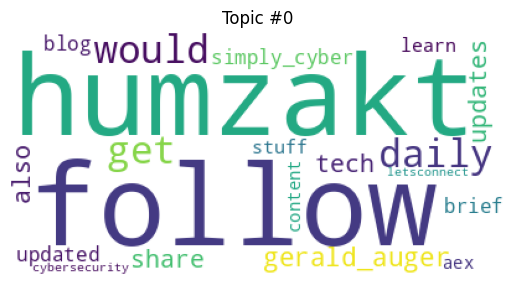

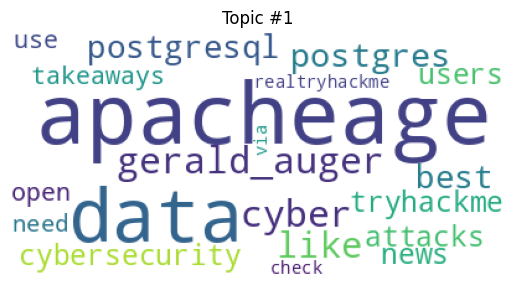

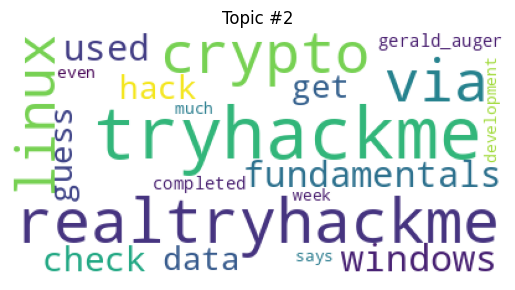

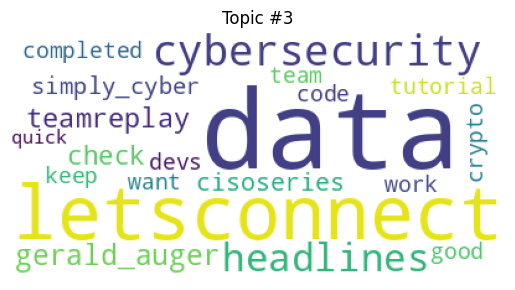

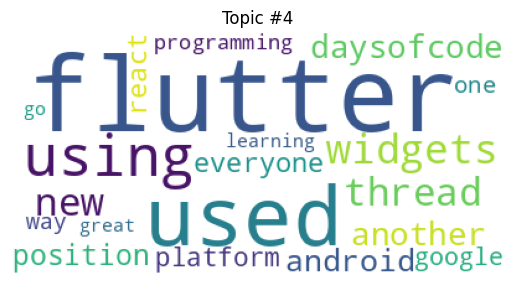


Coherence Score:  0.48614485542585406


In [29]:

import snscrape.modules.twitter as sntwitter
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Twitter username to scrape tweets from
username = "humzakt"

# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape tweets from the user
for tweet in sntwitter.TwitterSearchScraper(f"from:{username}").get_items():
    tweets_list.append([tweet.date, tweet.id, tweet.content])

# Creating a pandas dataframe from the tweets list
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text'])

# Preprocessing the tweets
stop_words = stopwords.words('english')
stop_words.extend(['http', 'https', 'co'])
def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in stop_words:
            result.append(token)
    return result
tweets_df['Processed Text'] = tweets_df['Text'].apply(preprocess)

# Creating a dictionary and corpus of the tweets
dictionary = gensim.corpora.Dictionary(tweets_df['Processed Text'])
corpus = [dictionary.doc2bow(text) for text in tweets_df['Processed Text']]

# Running LDA model for topic modeling
num_topics = 5
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

# Generating word clouds for each topic
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for i in range(num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color="white").fit_words(dict(lda_model.show_topic(i, 20))))
    plt.axis("off")
    plt.title("Topic #" + str(i))
    plt.show()

# Calculating coherence score for the LDA model
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets_df['Processed Text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Refactored Code

In [4]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 4.8 MB/s eta 0:00:00


In [14]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def scrape_tweets_from_user(username, num_tweets):
    """
    Scrapes tweets from a specified user's timeline and returns them as a list of DataFrames.
    """
    tweets_list = []
    scraper = sntwitter.TwitterSearchScraper(f"from:{username}")

    for lang in set(tweet.lang for tweet in scraper.get_items()):
        lang_tweets = []
        scraper = sntwitter.TwitterSearchScraper(f"from:{username} lang:{lang}")
        for i, tweet in enumerate(scraper.get_items()):
            if i >= num_tweets:
                break
            lang_tweets.append(tweet.content)
        df = pd.DataFrame({'text': lang_tweets})
        tweets_list.append((lang, df))

    return tweets_list


In [17]:
def preprocess_tweets(tweets_df):
    """
    Preprocesses the text of a pandas dataframe containing tweets by removing stop words, URLs, and other noise.
    """
    stop_words = stopwords.words('english')
    stop_words.extend(['http', 'https', 'co'])

    def preprocess(text):
        result = []
        for token in simple_preprocess(text):
            if token not in stop_words:
                result.append(token)
        return result

    tweets_df['Processed Text'] = tweets_df['Text'].apply(preprocess)
    
    return tweets_df



In [18]:
def generate_lda_model(tweets_df, num_topics=5, passes=10):
    """
    Generates an LDA topic model from a pandas dataframe containing preprocessed tweets.
    """
    # Creating a dictionary and corpus of the tweets
    dictionary = gensim.corpora.Dictionary(tweets_df['Processed Text'])
    corpus = [dictionary.doc2bow(text) for text in tweets_df['Processed Text']]

    # Running LDA model for topic modeling
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=passes)
    
    return lda_model

In [19]:
def generate_wordclouds(lda_model, lang):
    """
    Generates a word cloud for each topic in an LDA model for a specified language.
    """
    # Generating word clouds for each topic
    for i in range(lda_model.num_topics):
        plt.figure()
        plt.imshow(WordCloud(background_color="white").fit_words(dict(lda_model.show_topic(i, 20))))
        plt.axis("off")
        plt.title("Topic #" + str(i))
        plt.show()



In [22]:
def calculate_coherence(lda_model, tweets_df):
    """
    Calculates the coherence score for an LDA topic model.
    """
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets_df['Processed Text'], dictionary=lda_model.id2word, coherence='c_v')
    coherence_lda =coherence_model_lda.get_coherence()

    return coherence_lda

In [25]:
def topic_model_from_user(username, num_tweets, num_topics=5, passes=10):
    """
    Generates a topic model for a specified user's tweets in all languages they have tweeted in.
    """
    dfs_list = scrape_tweets_from_user(username, num_tweets)
    for lang, tweets_df in dfs_list:
        print(f"Generating word clouds for tweets in {lang}...")
        tweets_df = preprocess_tweets(tweets_df)
        lda_model = generate_lda_model(tweets_df, num_topics=num_topics, passes=passes)
        generate_wordclouds(lda_model, lang)
        print(f"Coherence score for tweets in {lang}: {calculate_coherence(lda_model, tweets_df)}\n")

    print("Topic modeling completed!")

In [ ]:
topic_model_from_user('humzakt', 100, num_topics=3, passes=10)

<ipython-input-16-ae0cb84e0943>:14: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  lang_tweets.append(tweet.content)


In [ ]:
username= "imrankhanpti" #input("Enter Username: ")

In [ ]:
num_tweets = 100

In [ ]:
# Scrape tweets from user
tweets_df = scrape_tweets_from_user(username, num_tweets)

In [3]:
# Preprocess tweets
tweets_df = preprocess_tweets(tweets_df)

NameError: ignored

In [ ]:
# Generate LDA model
lda_model = generate_lda_model(tweets_df)

In [ ]:
# Calculate Coherence Score
coherence_score = calculate_coherence(lda_model, tweets_df)
coherence_score


Coherence Score:  0.3116321954416457


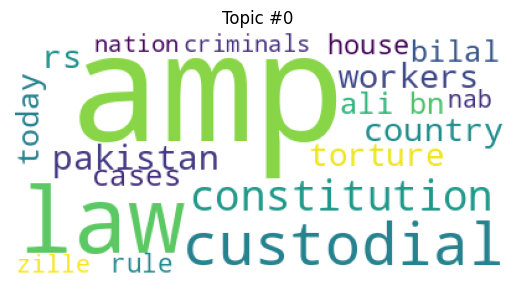

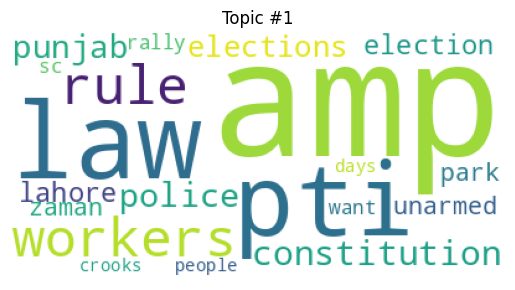

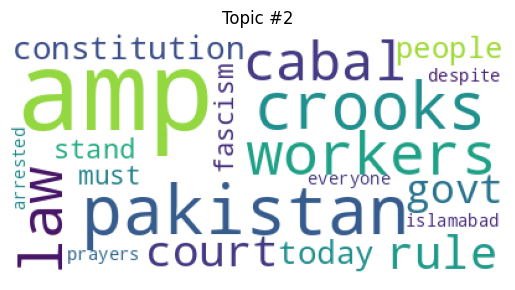

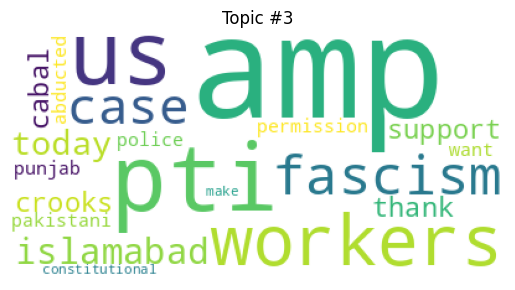

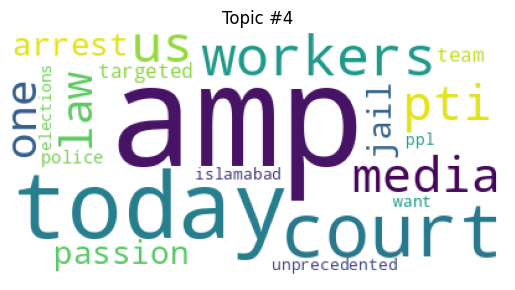

In [ ]:
# Generate Word Clouds
generate_wordclouds(lda_model)